# Chapter 5: Petflix sends Charlie a catbond meme


### Quick Start

If you are in the colab environment, please follow the steps below:

Step 1: Click Runtime -> Run all to run the notebook.

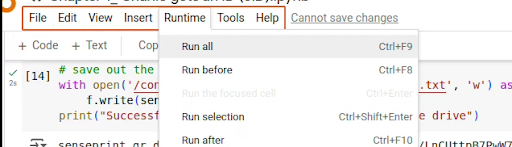

Step 2: You will be prompted to give permission to access your Google Drive files, which is essential for the notebook to save intermediate results. Please click on "Connect to Google Drive".

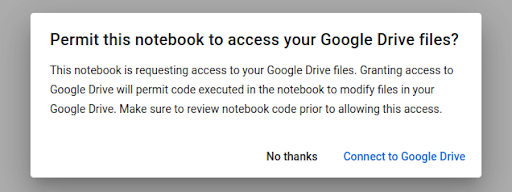

Step 3: Please click on "Run anyway" to run the notebook!

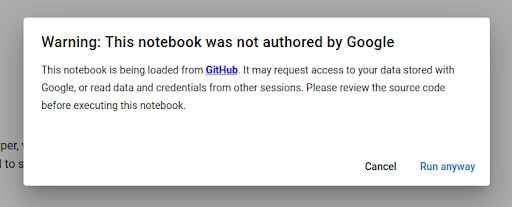

As an alternative to run all cells, you can also run cell by cell and give aforementioned permissions when prompted!

### 5.1 Overview
1. [Chapter 1_ Charlie gets an ID (eID)](https://colab.research.google.com/github/Seventh-Sense-Artificial-Intelligence/SenseCrypt-Walkthrough/blob/main/Chapter%201_%20Charlie%20gets%20an%20ID%20(eID).ipynb)
1. [Chapter 2_ Charlie wants a loan (eID)](https://colab.research.google.com/github/Seventh-Sense-Artificial-Intelligence/SenseCrypt-Walkthrough/blob/main/Chapter%202_%20Charlie%20wants%20a%20loan%20(eID).ipynb)
1. [Chapter 3_ Charlie signs up for Petflix (FacePKI)](https://colab.research.google.com/github/Seventh-Sense-Artificial-Intelligence/SenseCrypt-Walkthrough/blob/main/Chapter%203_%20Charlie%20signs%20up%20for%20Petflix%20(FacePKI).ipynb)
1. [Chapter 4_Charlie_signs into Petflix (FacePKI)](https://colab.research.google.com/github/Seventh-Sense-Artificial-Intelligence/SenseCrypt-Walkthrough/blob/main/Chapter%204_Charlie_signs%20into%20Petflix%20(FacePKI).ipynb)
1. [Chapter 5_Petflix sends Charlie a catbond meme (FacePKI)](https://colab.research.google.com/github/Seventh-Sense-Artificial-Intelligence/SenseCrypt-Walkthrough/blob/main/Chapter%205_Petflix%20sends%20Charlie%20a%20catbond%20meme%20(FacePKI).ipynb)
1. [Chapter 6_Charlie decrypts catbond meme (FacePKI)](https://colab.research.google.com/github/Seventh-Sense-Artificial-Intelligence/SenseCrypt-Walkthrough/blob/main/Chapter%206_Charlie%20decrypts%20catbond%20meme%20(FacePKI).ipynb)

### 5.2 Introduction

With the upcoming release of Catbond on Petflix, a highly anticipated spy-action movie featuring a sleek, sophisticated feline secret agent, the platform needed the perfect promotional campaign. Petflix prided itself on its innovative marketing strategies—never just trailers or ads, but a personalized approach that would get users excited before they even knew they were.<br><br>

Petflix had planned to send Charlie a personalized catbond meme with a promo code. Since the promo code should not be used by others, this meme should only be able to be viewed by Charlie.<br><br>

Let's see how we can do it with SenseCrypt PKI!

**Flow of Events:**
1. An AES encryption key is generated by Petflix.
1. This AES encryption key is used to encrypt the image.
1. The AES key itself is being encrypted using the Face Certificate.
1. The encrypted AES key and the encrypted image is sent to user.
1. The AES key is decrypted using the Sensecrypt server and the user face. (Chapter 6)
1. The decrypted AES key is then used to decrypt the image.(Chapter 6)

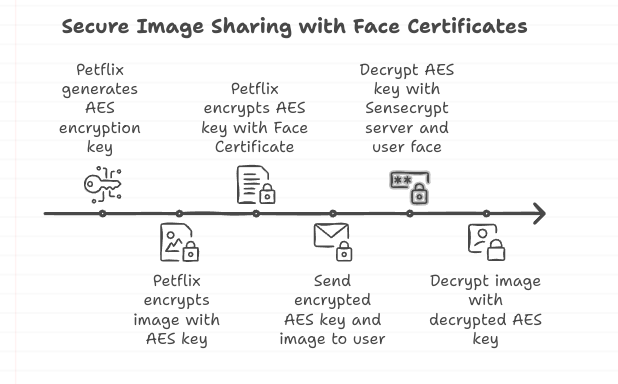

### 5.3 Pre-run cells

In [1]:
# **********************************INPUT************************************#
# Please provide the url of the SenseCrypt server and the associated api key.#
# ***************************************************************************#
url = "https://apiserver.sensecrypt.com/"
api_key = "BjeaACQczWh5Xw5sIEE0mBu1mpCnfOfmM47PT67f7mw="

In [2]:
# Run these functions, which will be used later in the notebook
import base64
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.backends import default_backend
import os
import base64
import requests
from PIL import Image
from io import BytesIO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# mount your private google drive for saving and loading out artifacts to be used in subsequent notebooks
from google.colab import drive
drive.mount('/content/drive')

def call_sensecrypt_server(api_key, data, endpoint, url):
  full_url = url + endpoint

  # Prepare headers
  headers = {
      "x-api-key": api_key,
      "Content-Type": "application/json"
  }

  # Send POST request
  response = requests.post(full_url, json=data, headers=headers)

  # Check the response status and content
  if response.status_code == 200:
      print("Request was successful")
      return response  # Return JSON data if the request was successful
  else:
      print(f"Request failed with status code: {response.status_code}")
      print(response.text)  # Print the raw response content
      return None

# Function to encrypt the image
def encrypt_image(image_path_or_binary, output_path, key):
  # Check if the input is binary data (bytes)
  if isinstance(image_path_or_binary, bytes):
      print("The input is already binary data.")
      image_data = image_path_or_binary
  else:
      # Assume it's a file path and read the image as binary data
      with open(image_path_or_binary, 'rb') as image_file:
          image_data = image_file.read()

  # AES requires a block size of 16 bytes, so we need to pad the data
  padder = padding.PKCS7(algorithms.AES.block_size).padder()
  padded_data = padder.update(image_data) + padder.finalize()

  # Generate a random 16-byte IV (Initialization Vector)
  iv = os.urandom(16)

  # Create AES cipher in CBC mode
  cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())
  encryptor = cipher.encryptor()
  encrypted_data = encryptor.update(padded_data) + encryptor.finalize()

  # Save the encrypted data and IV to a file (prepend the IV to the ciphertext)
  with open(output_path, 'wb') as output_file:
      output_file.write(iv + encrypted_data)

def fetch_image(image_url):
  response = requests.get(image_url)
  img = Image.open(BytesIO(response.content))
  return img


Mounted at /content/drive


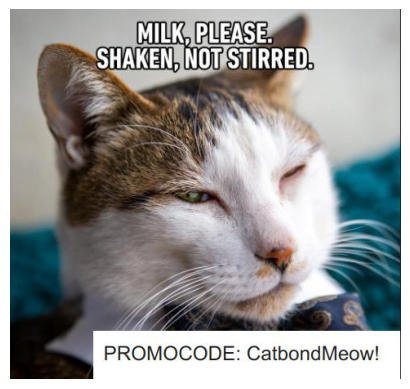

In [3]:
# preview of the catbond meme
img_catbond = fetch_image("https://drive.google.com/uc?export=view&id=1VMR5dEBbk0QpX3huuEFc_GkDFyhsoxbM")
plt.imshow(img_catbond)
plt.axis('off')
plt.show()

### 5.4 Using the `/encrypt-with-face-certificate` API Endpoint [(Link to documentation)](https://docs.sensecrypt.com/sensecrypt-v3.1.1/sensecrypt-server/sensecrypt-face-pki/encrypting-data-keys-using-a-face-certificate)


In [4]:
# Generate a 32-byte key (for AES-256)
key = os.urandom(32)
print(f"Generated AES key: {key.hex()}")  # Debug: Check if key is generated correctly

# Encrypt image
image_url = "https://drive.google.com/uc?export=view&id=1VMR5dEBbk0QpX3huuEFc_GkDFyhsoxbM"
image_binary = requests.get(image_url).content
encrypt_image(image_binary, '/content/drive/MyDrive/encrypted_image.bin', key)

print("Image encrypted successfully!")

Generated AES key: 90749ab5875d8a9eefaf11f87c3f5fe389f5d7f20681a62c9965e6f6c22cf347
The input is already binary data.
Image encrypted successfully!


In [5]:
# load the face certificate into memory
face_cert = open('/content/drive/MyDrive/face_cert.pem', 'r').read()
print("face_cert:", face_cert)

face_cert: -----BEGIN CERTIFICATE-----
MIICXjCCAgSgAwIBAgIRAPZ5oW6xYhiFTsdXEpO3giQwCgYIKoZIzj0EAwIwSDFG
MEQGA1UEAww9U2Vuc2VDcnlwdCBDdXN0b21lciBJRCAoYTZiNDQ5MzQtN2Q0Yi00
OWFlLWI4MjQtMDBmZWQ2MjU1ZmY2KTAeFw03MDAxMDEwMDAwMDBaFw0zNDEwMDEw
MDAwMDBaMCkxJzAlBgNVBAMMHmNoYXJsaWVfY3J5cHRvZnNvbkBleGFtcGxlLmNv
bTBWMBAGByqGSM49AgEGBSuBBAAKA0IABNXtnPvMDHRf3nOdE+QbllOBpn1EslDm
CPwR5WZv/vn4ZK9eIm4/rEN4vYsFRpJkLiJEIDnCvG5Qfyk8Y+dL2hajgfAwge0w
DgYDVR0PAQH/BAQDAgWgMIHaBgoqhT4Ah3QBAQEABIHLA9/u7MFhJlrg+z/I1mVt
g4GaS3ardofo7OssYERRhS9Bx9el+FedcHeELnowMyzGPivWLmYY+IDcWtp6eKCk
8gfzmnOG6v1eAfWsk8FsRTlHZPxZ9giHA0sGyvnbNAqwW+kTpEkuvYYP85esBIc0
pANQTK24tr1CpZ/FN/kNtB06svhyhFOi3Hqfw0Apxjz3ymVw3V6yxqHw2VwQFZpA
+krcsH0c35lU8LtSwm469rnuB9ybykYbEIAWr5GmTMt5GY22ny6RpW+GazcwCgYI
KoZIzj0EAwIDSAAwRQIgH7ZY5Tpd0020gHxdbpfmMQBRvIgDo2hSDEmlUSusVOMC
IQCxQ8sIRWwV96lNh1sL8EHRLsw2YGyjYC5f7uxwjelEEQ==
-----END CERTIFICATE-----



In [6]:
# encode key as base64
key_base64 = base64.b64encode(key).decode('utf-8')

data = {
    "face_certificate_pem": face_cert,
    "key_base_64": key_base64,
}

endpoint = "/encrypt-with-face-certificate"
response = call_sensecrypt_server(api_key, data, endpoint, url)
encrypted_key = response.json()['encrypted_key_base_64']
print("encrypted_key:", encrypted_key)

# save out the encrypted image and the encrypted key
# In the next chapter, we shall load the encrypted image and encrypted key
with open('/content/drive/MyDrive//encrypted_key.bin', 'w') as f:
    f.write(encrypted_key)

print("Encrypted key saved successfully!")

Request was successful
encrypted_key: Aurd97s1TK/2weFDNsKcHaeerG6e5tu0ooKGoNCV66datyMvSvU5F+mePFPLRiCZnNuiMHNIh5i/h5bSmEGn7VvdipkKU0LGdDmKenEywx4wijxBX5ME8d2p5S9n5g4sjQ==
Encrypted key saved successfully!


Both the catbond meme image and the AES encryption key has been encrypted now.
Both the image and the AES key are then sent to Charlie through an email. Charlie can then use the SenseCrypt `/face-decrypt` endpoint to decrypt the key. And then use the decrypted key to decrypt the catbond image. Let's see how this is done in the next chapter!

Continue on to the last chapter, Chapter 6: Charlie decrypts catbond meme [here](https://drive.google.com/file/d/1CLy5PYowbgTDiLMyHMhh3SWtqwgF_mWA/view?usp=sharing)!